# Proyek Analisis Data: Bike Sharing Dataset

- **Nama**: Afad Fath Musyarof Halim
- **Email**: Afadfath03@gmail.com
- **ID Dicoding**: afadfath03

## Menentukan Pertanyaan Bisnis

- Apa saja yang memiliki pengaruh positif terhadap jumlah pesepeda?
- Bagaimana kondisi lingkungan berpengaruh negatif pada pesepeda?

## Import Semua Packages/Library yang Digunakan

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [45]:
df_hour = pd.read_csv('data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Hanya `hour.csv` yang digunakan karena data lebih lengkap dan mendetail dari `day.csv`

### Assessing Data

In [46]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- `dteday` masih berupa object
- penamaan kolom kurang dapat dipahami

In [47]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [48]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [49]:
duplicate = df_hour.duplicated().sum()
print("Jumlah duplikat: ", duplicate)

Jumlah duplikat:  0


### Cleaning Data

In [50]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- Mengubah tipe data dari `dteday` menjadi datetime

In [51]:
df_hour.rename(columns={
    'instant': 'record_id',
    'dteday': 'date',
    'hr': 'hour',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'is_holiday',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_bikers',
    'registered': 'registered_bikers',
    'cnt': 'total_bikers'
}, inplace=True)
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   record_id               17379 non-null  int64         
 1   date                    17379 non-null  datetime64[ns]
 2   season                  17379 non-null  int64         
 3   year                    17379 non-null  int64         
 4   month                   17379 non-null  int64         
 5   hour                    17379 non-null  int64         
 6   is_holiday              17379 non-null  int64         
 7   weekday                 17379 non-null  int64         
 8   workingday              17379 non-null  int64         
 9   weather_situation       17379 non-null  int64         
 10  temperature             17379 non-null  float64       
 11  feels_like_temperature  17379 non-null  float64       
 12  humidity                17379 non-null  float6

- Mengubah nama kolom menjadi lebih mudah dibaca

## Exploratory Data Analysis (EDA)

In [52]:
df_hour.describe()

,record_id,date,season,year,month,hour,is_holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,wind_speed,casual_bikers,registered_bikers,total_bikers
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


- Waktu Siang hari (sekitar pukul 11) adalah waktu rata rata bersepeda
- Akhir pekan (weekday) memiliki pesepeda 3x lebih dari hari kerja (workingday)
- Rata-rata pesepeda ada pada sekitar musim panas (summer) dan musim gugur (fall)
- Pesepeda dengan status terdaftar (registered) lebih banyak daripada casual
- Rata-rata pesepeda saat cuaca cerah sampai sedikit berawan

In [53]:
df_hour.corr(method='pearson')

,record_id,date,season,year,month,hour,is_holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,wind_speed,casual_bikers,registered_bikers,total_bikers
record_id,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
date,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
year,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
month,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hour,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
is_holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weather_situation,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


Faktor yang mempengaruhi meningkatnya jumlah pesepeda antara lain suhu (korelasi 0.404772) dan jam (korelasi 0.394071)

Faktor lingkungan yang mempengaruhi turunnya pesepeda antara lain Kelembaban (korelasi -0.322911), Hari libur (korelasi -0.347028), dan Situasi cuaca (korelasi -0.142426)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja yang memiliki pengaruh positif terhadap jumlah pesepeda?

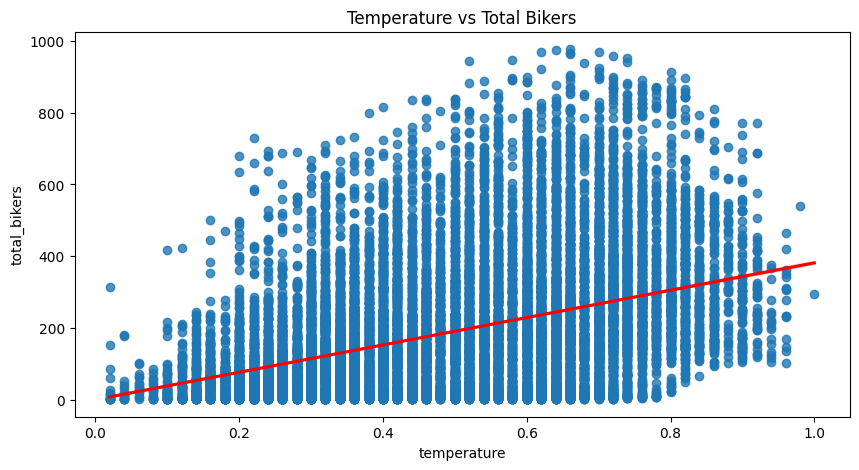

In [54]:
plt.figure(figsize=(10, 5))

sns.regplot(
    x='temperature', 
    y='total_bikers', 
    data=df_hour,
    label='Temperature',
    line_kws={'color': 'red'},)

plt.title('Temperature vs Total Bikers')
plt.show()

In [55]:
print("Korelasi antara temperature dan jumlah pesepeda: ", df_hour['temperature'].corr(df_hour['total_bikers']))

Korelasi antara temperature dan jumlah pesepeda:  0.4047722757786589


Visualisasi di atas menunjukkan semakin tinggi temperature semakin banyak pula jumlah pesepeda

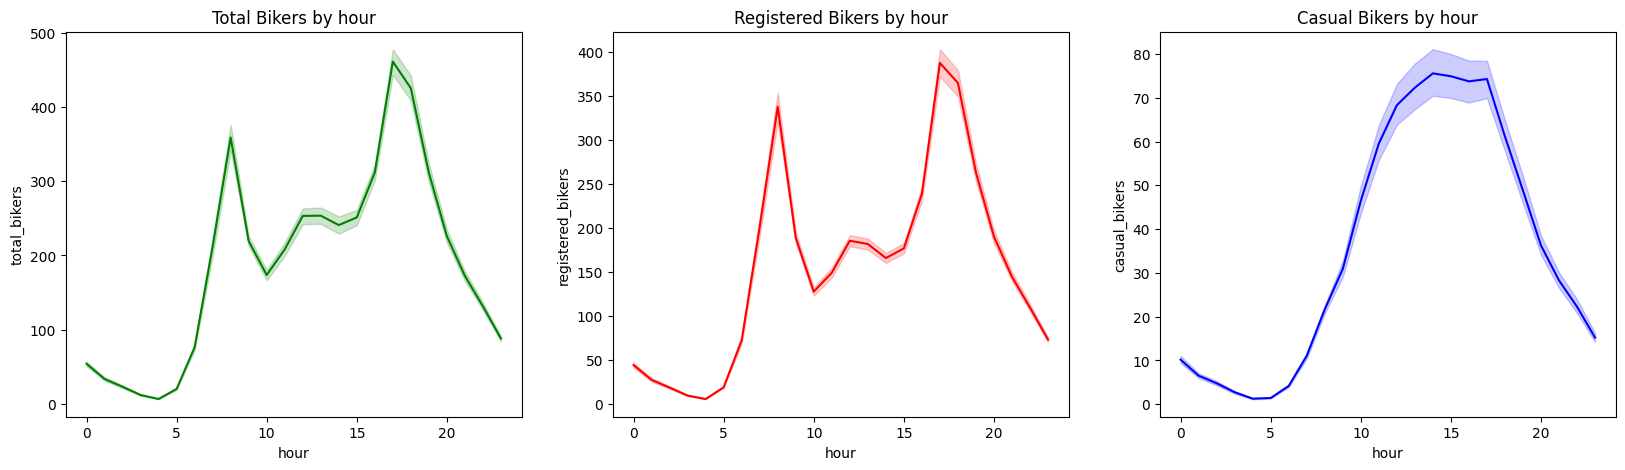

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

sns.lineplot(
    x='hour', 
    y='total_bikers', 
    data=df_hour,
    color='green',
    ax=ax[0])

ax[0].set_title('Total Bikers by hour')

sns.lineplot(
    x='hour', 
    y='registered_bikers', 
    data=df_hour,
    color='red',
    ax=ax[1])
ax[1].set_title('Registered Bikers by hour')


sns.lineplot(
    x='hour', 
    y='casual_bikers', 
    data=df_hour,
    color='blue',
    ax=ax[2])
ax[2].set_title('Casual Bikers by hour')

plt.show()

Visualisasi tersebut menunjukkan jumlah rata rata pesepeda terbagi antara pagi dan sore dimana waktu tersebut adalah waktu olahraga dan waktu yang menandai akhir hari

### Pertanyaan 2: Bagaimana kondisi lingkungan berpengaruh negatif pada pesepeda?

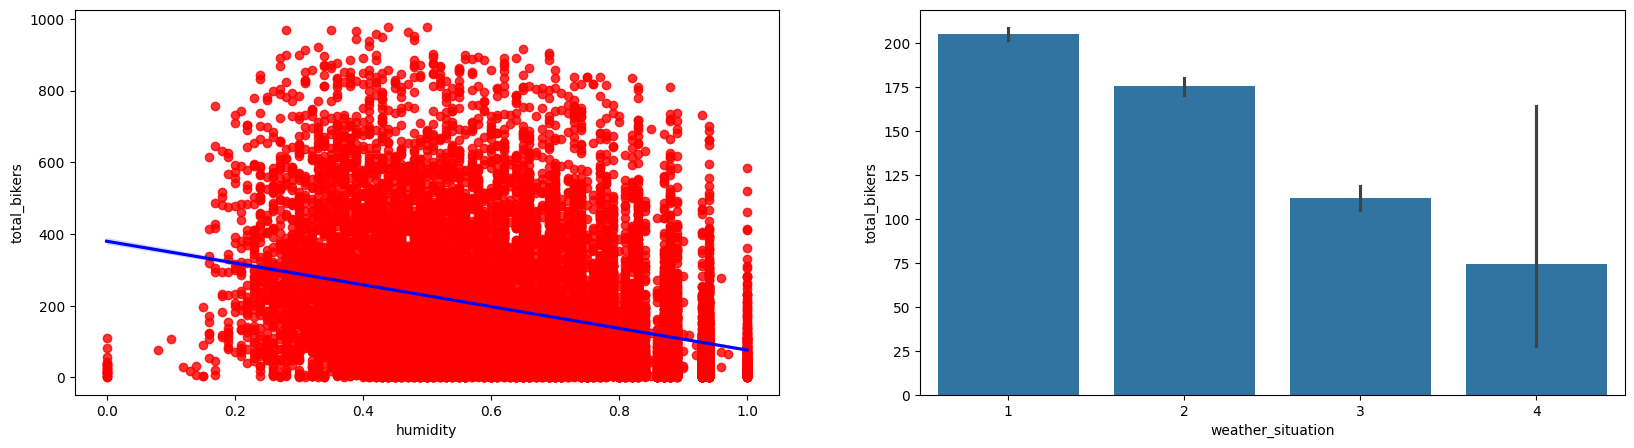

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.regplot(
    x='humidity', 
    y='total_bikers', 
    data=df_hour,
    color='red',
    line_kws={'color': 'blue'},
    ax=ax[0])

sns.barplot(
    x='weather_situation', 
    y='total_bikers', 
    data=df_hour,
    ax=ax[1])

plt.show()

In [58]:
print("Korelasi antara kelembapan dan jumlah pesepeda: ", df_hour['total_bikers'].corr(df_hour['humidity']))
print("Korelasi antara situasi cuaca dan jumlah pesepeda: ", df_hour['total_bikers'].corr(df_hour['weather_situation']))

Korelasi antara kelembapan dan jumlah pesepeda:  -0.3229107408245601
Korelasi antara situasi cuaca dan jumlah pesepeda:  -0.14242613813809538


Visualisasi di atas menunjukkan semakin tinggi kelembapan semakin sedikit pula jumlah pesepeda serta situasi cuaca dimana cuaca cerah (1) yang terbanyak di ikuti berkabut (2), badai ringan (3), dan badai besar(4)


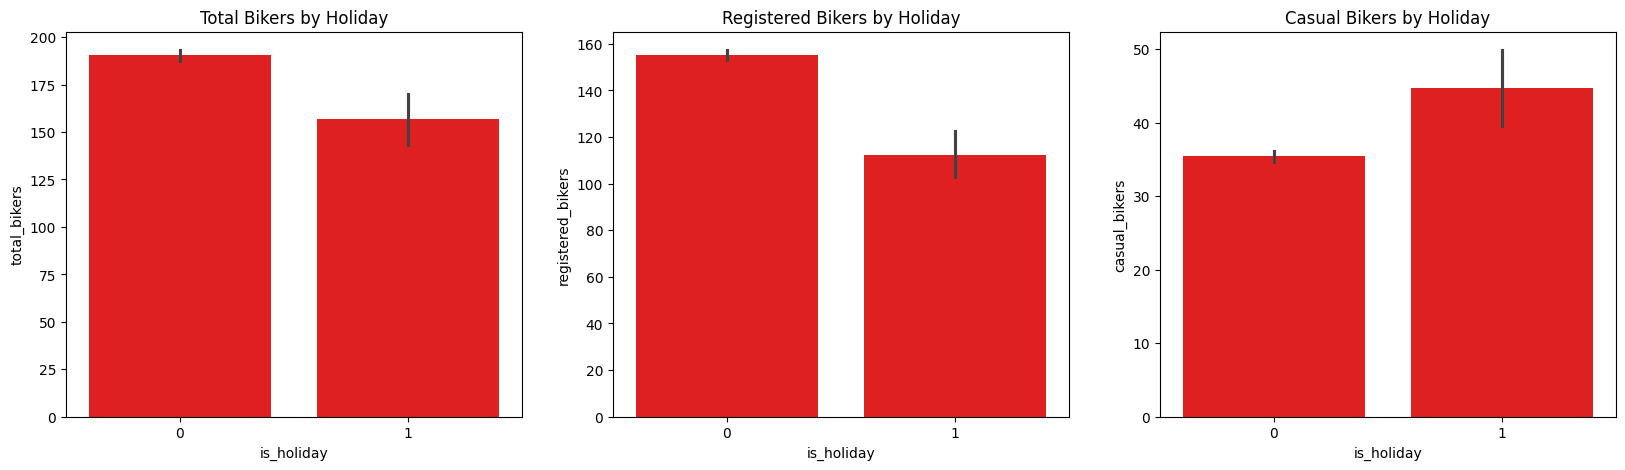

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

sns.barplot(
    x='is_holiday', 
    y='total_bikers', 
    data=df_hour,
    color='red',
    ax=ax[0])
ax[0].set_title('Total Bikers by Holiday')

sns.barplot(
    x='is_holiday', 
    y='registered_bikers', 
    data=df_hour,
    color='red',
    ax=ax[1])
ax[1].set_title('Registered Bikers by Holiday')

sns.barplot(
    x='is_holiday', 
    y='casual_bikers', 
    data=df_hour,
    color='red',
    ax=ax[2])
ax[2].set_title('Casual Bikers by Holiday')

plt.show()

Perbandingan di atas menunjukkan bahwa saat hari libur, total pesepeda berkurang.
<br>
Bagi pesepeda yang telah terdaftar, hari libur mengurangi jumlah pesepeda. Sedangkan bagi yang kasual, jumlah pesepeda pada hari libur bertambah.

## Analisis Lanjutan

Teknik yang dipilih adalah `Clustering` dimana data yang unik dan hampir sama akan dikelompokkan sehingga data yang berbeda akan berada pada posisi yang berbeda pula

### 0. Import package

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 1. Data Scaling

Digunakan untuk mengubah model data biasa menjadi bisa digunakan sebagai bahan scaling atau standar normalisasi data. serta acuan kelompok

In [68]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_hour[['total_bikers','registered_bikers', 'casual_bikers', 'temperature', 'humidity', 'wind_speed', 'hour', 'workingday', 'is_holiday']])
df_scaled = pd.DataFrame(df_scaled, columns=['total_bikers','registered_bikers', 'casual_bikers', 'temperature', 'humidity', 'wind_speed', 'hour', 'workingday', 'is_holiday'])
df_scaled.head()

,total_bikers,registered_bikers,casual_bikers,temperature,humidity,wind_speed,hour,workingday,is_holiday
0,-0.956339,-0.930189,-0.662755,-1.334648,0.947372,-1.553889,-1.670004,-1.4669,-0.172112
1,-0.824022,-0.804655,-0.561343,-1.438516,0.895539,-1.553889,-1.525374,-1.4669,-0.172112
2,-0.868128,-0.837690,-0.622190,-1.438516,0.895539,-1.553889,-1.380744,-1.4669,-0.172112
3,-0.972879,-0.950010,-0.662755,-1.334648,0.636370,-1.553889,-1.236115,-1.4669,-0.172112
4,-1.039037,-1.009474,-0.723603,-1.334648,0.636370,-1.553889,-1.091485,-1.4669,-0.172112


### 2. K-Means Clustering

#### 2.1 Jumlah cluster yang dibutuhkan

Menggunakan Elbow Method

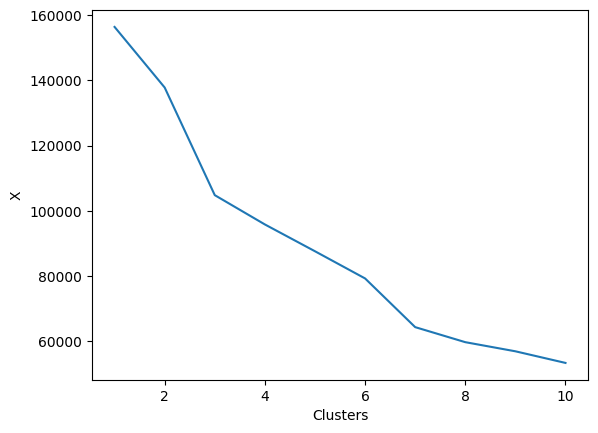

In [69]:
x = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    x.append(kmeans.inertia_)

plt.plot(range(1, 11), x)
plt.xlabel('Clusters')
plt.ylabel('X')
plt.show()

Pada cluster 3 sampai 5, mulai terlihat perlambatan penurunan yang artinya jumlah cluster optimal ada di antara 3 dan 5.
<br>
Karena ada di antara 2 titik 3 dan 5 maka diputuskan mengambil titik tengah yaitu 4

#### 2.2 Pengelompokkan cluster

Digunakan dalam proses pengelompokkan data

In [71]:
km = KMeans(n_clusters=4)
km

ds_predicted = km.fit_predict(df_scaled[['total_bikers','registered_bikers', 'casual_bikers', 'temperature', 'humidity', 'wind_speed', 'hour', 'workingday', 'is_holiday']])
ds_predicted

df_hour['kondisi_lingkungan'] = ds_predicted
df_hour

,record_id,date,season,year,month,hour,is_holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,wind_speed,casual_bikers,registered_bikers,total_bikers,kondisi_lingkungan
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,0
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,0
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,0
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,0


### 3. Visualisasi

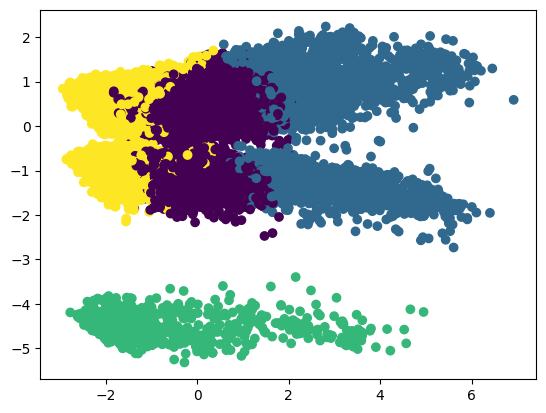

In [73]:
pca = PCA(n_components=4)
data_pca = pca.fit_transform(df_scaled[['total_bikers', 'registered_bikers', 'casual_bikers', 'temperature', 'humidity', 'wind_speed', 'hour', 'workingday', 'is_holiday']])

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_hour['kondisi_lingkungan'], cmap='viridis')
plt.show()

### 4. Analisa Cluster

In [75]:
df_hour.groupby('kondisi_lingkungan').mean()

,record_id,date,season,year,month,hour,is_holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,wind_speed,casual_bikers,registered_bikers,total_bikers
kondisi_lingkungan,,,,,,,,,,,,,,,,,
0,7913.562259,2011-11-30 12:10:30.743801600,2.393802,0.433333,6.298623,16.158402,0.0,3.006887,0.778788,1.438567,0.474939,0.456254,0.584618,0.214075,27.786501,147.811019,175.597521
1,10728.686537,2012-03-27 07:41:14.614945792,2.795208,0.689390,7.089846,14.662578,0.0,3.124929,0.613234,1.247576,0.652693,0.611490,0.518962,0.204327,102.059327,369.234740,471.294067
2,9119.174000,2012-01-20 03:50:24.000000000,2.440000,0.522000,6.906000,11.566000,1.0,1.814000,0.000000,1.362000,0.466400,0.444850,0.615360,0.192932,44.718000,112.152000,156.870000
3,8407.768035,2011-12-21 15:51:40.605267456,2.466383,0.476035,6.475053,4.281204,0.0,3.027646,0.664322,1.516604,0.436372,0.423652,0.740900,0.153229,6.233928,40.723213,46.957141


kesimpulan dari data di atas

1. Cluster 0:
 - **Musim**: Musim panas (`2`)
 - **Jam**: Siang (`12..`)
 - **Hari Kerja**: Iya (`0,78..`)
 - **Hari Libur**: Tidak (`0`)
 - **Situasi Cuaca**: Cerah dengan sedikit awan (`1,5..`)
 - **Pesepeda Kasual**: Rendah (`27,78..`)
 - **Pesepeda Terdaftar**: Tinggi (`147,81..`)
 - **Total Pesepeda**: (`175,59..`)
 - Kesimpulan: Waktu sibuk, Kemungkinan didominasi oleh pesepeda rutin.

2. Cluster 1:
 - **Musim**: Musim panas (`2`)
 - **Jam**: Pagi hari (`7,08..`)
 - **Hari Kerja**: Iya (`0,61..`)
 - **Akhir pekan**: Tidak (`0`)
 - **Hari Libur**: Tidak (`0`)
 - **Situasi Cuaca**: Cerah dengan sedikit awan (`1`)
 - **Pesepeda Kasual**: Menengah (`102,05..`)
 - **Pesepeda Terdaftar**: Sangat tinggi (`369,23..`)
 - **Total Pesepeda**: (`471,29..`)
 - Kesimpulan: Waktu puncak bersepeda, kemungkinan untuk perjalanan kerja.

3. Cluster 2:
 - **Musim**: Musim panas (`2`)
 - **Jam**: Tengah malam (`3,85..`)
 - **Hari Kerja**: Tidak (`0,0`)
 - **Akhir pekan**: Iya (`1,81..`)
 - **Hari Libur**: Iya (`1`)
 - **Situasi Cuaca**: Mendung dengan kabut (`2`)
 - **Pesepeda Kasual**: Rendah (`44,71..`)
 - **Pesepeda Terdaftar**: Menengah (`112,15..`)
 - **Total Pesepeda**: (`156,87..`)
 - Kesimpulan: Aktivitas bersepeda menurun, tetapi masih ada pengguna terdaftar.

4. Cluster 3:
 - **Musim**: Musim panas (`2`)
 - **Jam**: Sore hari (`4,28..`)
 - **Hari Kerja**: Iya (`0,66..`)
 - **Akhir pekan**: Tidak (`0`)
 - **Hari Libur**: Tidak (`0`)
 - **Situasi Cuaca**: Mendung dengan hujan ringan (`3`)
 - **Pesepeda Kasual**: Sangat rendah (`6,23..`)
 - **Pesepeda Terdaftar**: Rendah (`40,72..`)
 - **Total Pesepeda**: (`46,95..`)
 - Kesimpulan: Cuaca buruk dan waktu kurang diminati untuk bersepeda.


## Conclusion

- Conclusion Pertanyaan 1: Apa saja yang memiliki pengaruh positif terhadap jumlah pesepeda?
1. Adanya korelasi positif antara suhu yang lebih tinggi dan peningkatan jumlah pesepeda yang artinya orang lebih cenderung bersepeda saat suhu hangat.
2. Waktu rata rata adalah sekitar siang hari namun statistik menunjukkan maksimum jumlah pesepeda ada di antara jam sore dan pagi menjelang siang dimana waktu tersebut adalah waktu istirahat atau waktu yang menandai akhir hari

- Conclusion Pertanyaan 2: Bagaimana kondisi lingkungan berpengaruh negatif pada pesepeda?
1. Semakin tinggi kelembapan semakin sedikit pula jumlah pesepeda serta semakin buruk cuaca semakin rendah pula pesepeda
2. Bagi pesepeda yang telah terdaftar, hari libur mengurangi jumlah pesepeda. Sedangkan bagi pesepeda kasual, jumlah pesepeda pada hari libur bertambah. 
    - Digabungkan dengan kesimpulan pertanyaan 1, dapat di asumsikan pesepeda terdaftar merupakan seorang yang memiliki pekerjaan yang memerlukan kendaraan untuk berangkat dan pulang kerja